In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

In [5]:
df.shape

(100, 6)

In [6]:
df.head()

,col1,col2,col3,col4,col5,target
0,-2.362636,-0.739333,2.509050,-1.987765,2.533452,1
1,-0.129019,-1.496963,0.342859,-0.105740,0.079779,1
2,-0.611627,-0.346155,2.021838,-1.630173,1.556230,1
3,-0.706032,-1.210889,2.049208,-1.161125,2.221907,1
4,-3.235217,2.357046,-2.913046,-3.747877,-2.169921,0


In [7]:
#row sampling
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [8]:
#feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]))
    return df[cols]

In [9]:
#combined samples
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [10]:
df_1 = sample_rows(df,0.1)

In [11]:
df_1

,col1,col2,col3,col4,col5,target
95,-1.032955,0.123027,2.200549,0.311694,-1.370222,0
34,-0.541913,1.464866,3.429247,-2.201339,-1.988103,0
19,0.846192,-2.265909,1.671322,-0.644095,1.985753,1
69,-3.022142,0.899125,1.597993,-3.316187,-4.119987,0
21,-0.016660,1.011427,0.643159,-1.248192,0.946583,0
39,-0.454244,-0.335718,3.671576,-1.469550,2.011870,1
11,-0.470368,-0.184468,1.880197,-1.200300,0.581420,1
95,-1.032955,0.123027,2.200549,0.311694,-1.370222,0
38,2.093399,-0.321224,3.935400,1.280615,2.621586,0
76,1.425577,2.000387,2.964898,1.013938,-0.216044,1


In [12]:
df_2 = sample_rows(df,0.1)

In [13]:
df_3 = sample_rows(df,0.1)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [16]:
clf1.fit(df_1.iloc[:,0:5], df_1.iloc[:,-1])
clf2.fit(df_2.iloc[:,0:5], df_2.iloc[:,-1])
clf3.fit(df_3.iloc[:,0:5], df_3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.4, 0.875, 'x[0] <= -0.506\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'x[0] <= 1.759\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4, 0.375, 'x[2] <= 1.157\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

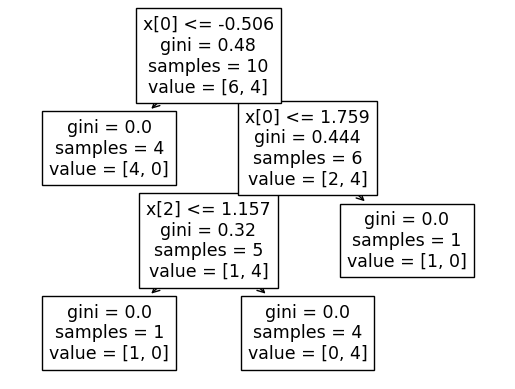

In [18]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[1] <= -0.234\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

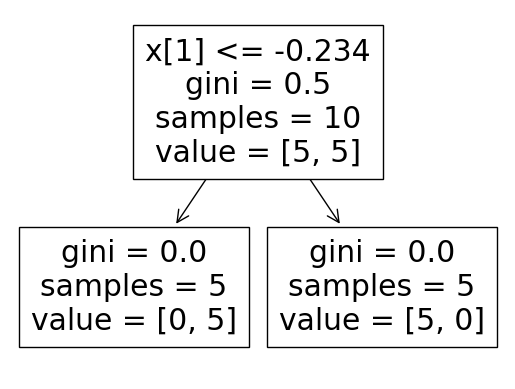

In [19]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[1] <= 1.382\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.4, 0.5, 'x[4] <= -1.074\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

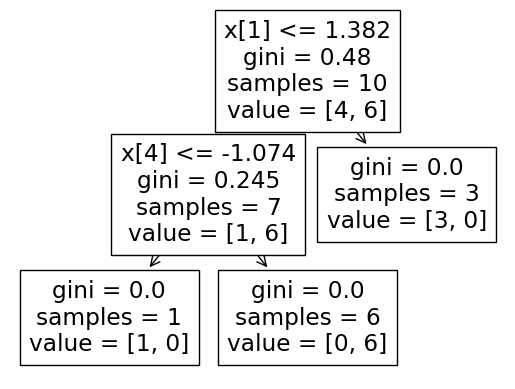

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict(np.array([1.247224,	-1.284429,	-2.687299,	-0.725626,	-1.407315]).reshape(1, 5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf2.predict(np.array([1.247224,	-1.284429,	-2.687299,	-0.725626,	-1.407315]).reshape(1, 5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
clf3.predict(np.array([1.247224,	-1.284429,	-2.687299,	-0.725626,	-1.407315]).reshape(1, 5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

 **Remaining you do for features and combination**

Now Let's see with Randomforestclassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df[['col1', 'col2', 'col3', 'col4', 'col5']], df['target'], test_size=0.3, random_state=42)

In [30]:
clf = RandomForestClassifier(n_estimators=3, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.00%


In [32]:
#prediction test sample from above data
clf.predict(np.array([1.247224,	-1.284429,	-2.687299,	-0.725626,	-1.407315]).reshape(1, 5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

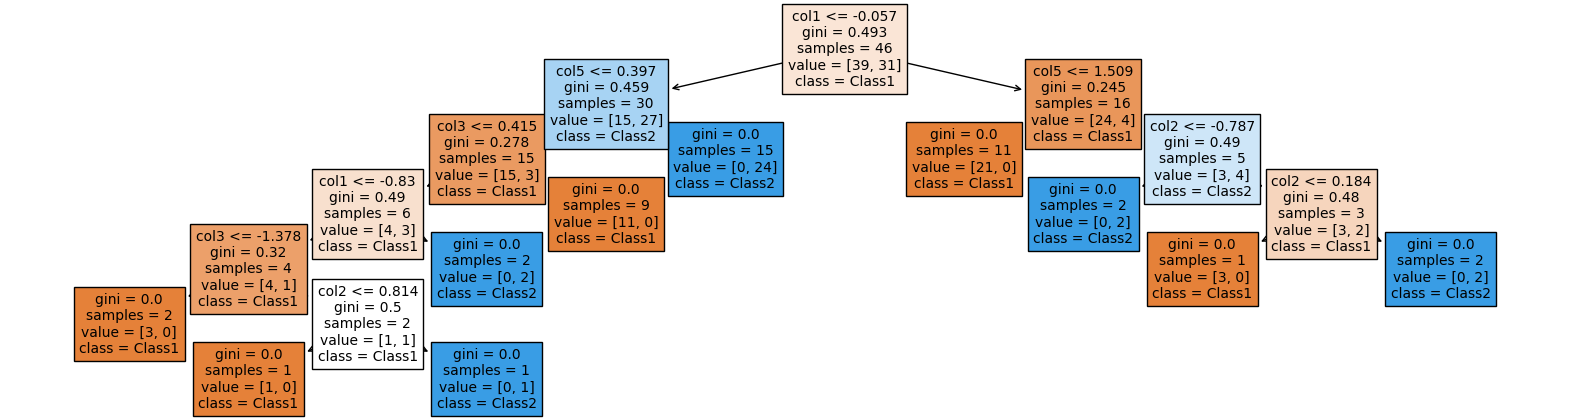

In [34]:
tree = clf.estimators_[0]

plt.figure(figsize=(20,5))

plot_tree(tree, filled=True, feature_names=['col1', 'col2', 'col3', 'col4', 'col5'], class_names=['Class1', 'Class2'], fontsize=10)
plt.show()